In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# MA gov opioid overdose deaths table 1 (by town of residence of descendent)
table1_raw = pd.read_csv("../raw_data/ma_overdose_death_by_town_2014_2018_table1.csv")
# MA gov opioid overdose deaths table 2 (by town of death)
table2_raw = pd.read_csv("../raw_data/ma_overdose_death_by_town_2014_2018_table2.csv")

In [3]:
print(table1_raw.shape)
print(table2_raw.shape)
display(table1_raw.head())
display(table2_raw.head())

(353, 6)
(354, 6)


,City/Town of Residence,2014,2015,2016,2017,2018
0,Abington,2,6,2,4,11
1,Acton,3,4,7,1,4
2,Acushnet,1,4,4,7,2
3,Adams,2,3,1,0,7
4,Agawam,3,5,4,7,12


,City/Town of Death,2014,2015,2016,2017,2018
0,Abington,0,6,1,3,5
1,Acton,1,2,3,0,1
2,Acushnet,0,4,2,4,0
3,Adams,2,3,1,0,4
4,Agawam,1,2,0,4,8


In [4]:
table1 = table1_raw.copy()
table2 = table2_raw.copy()
table1.columns = ['city_resid'] + list(table1_raw.columns[1:])
table2.columns = ['city_death'] + list(table2_raw.columns[1:])

In [5]:
# why more 1 more row in table 2?
set(table2['city_death']) - set(table1['city_resid'])
# this is mass residents that died outside of massachusetts

{'Out Of Massachusetts'}

In [6]:
# convert city names to lowercase, use as index
table1['city_resid'] = table1['city_resid'].str.lower()
table2['city_death'] = table2['city_death'].str.lower()
table1.set_index('city_resid', inplace=True)
table2.set_index('city_death', inplace=True)

In [7]:
display(table1.head())
display(table2.head())

,2014,2015,2016,2017,2018
city_resid,,,,,
abington,2,6,2,4,11
acton,3,4,7,1,4
acushnet,1,4,4,7,2
adams,2,3,1,0,7
agawam,3,5,4,7,12


,2014,2015,2016,2017,2018
city_death,,,,,
abington,0,6,1,3,5
acton,1,2,3,0,1
acushnet,0,4,2,4,0
adams,2,3,1,0,4
agawam,1,2,0,4,8


In [8]:
table2.loc['out of massachusetts']

2014    29
2015    52
2016    90
2017    80
2018    62
Name: out of massachusetts, dtype: int64

In [9]:
totals = pd.concat([table1.loc[['total']], table2.loc[['total']]], axis=0).reset_index()
totals['table'] = ['town_of_residence', 'town_of_death']
totals.drop('index', inplace=True, axis=1)

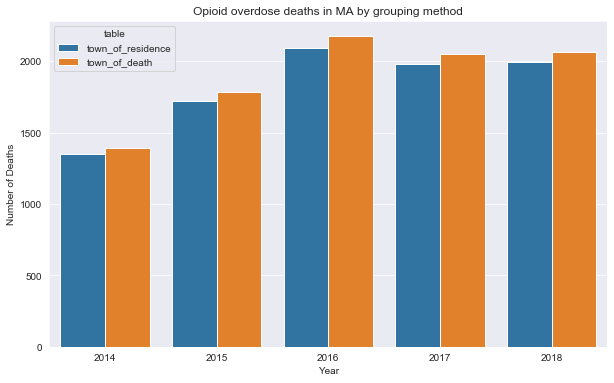

In [10]:
# how do the total death counts compare between the two tables?
plt.figure(figsize=(10,6))
sns.barplot(x='variable', y='value', hue='table', data=totals.melt(id_vars=['table']))
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Opioid overdose deaths in MA by grouping method')
plt.show()

In [11]:
# totals check to make sure sum of all rows matches Total row
table1_tot = table1.loc['total']
table2_tot = table2.loc['total']
table1.drop('total', inplace=True)
table2.drop('total', inplace=True)
print(table1.sum() - table1_tot)
print(table2.sum() - table2_tot)
# everything matches up

2014    0
2015    0
2016    0
2017    0
2018    0
dtype: int64
2014    0
2015    0
2016    0
2017    0
2018    0
dtype: int64


In [12]:
# drop a couple of extra rows that will not be used in prediction model
table1.drop('unknown', inplace=True)
table2.drop(['unknown', 'out of massachusetts'], inplace=True)
print(table1.shape)
print(table2.shape)

(351, 5)
(351, 5)


In [13]:
display(table1.describe())
display(table2.describe())

,2014,2015,2016,2017,2018
count,351.000000,351.000000,351.000000,351.000000,351.000000
mean,3.846154,4.905983,5.965812,5.638177,5.669516
std,8.769051,12.030188,14.216850,14.080488,14.013021
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,2.000000,2.000000,2.000000
75%,4.000000,5.000000,6.000000,6.000000,6.000000
max,108.000000,151.000000,194.000000,198.000000,181.000000


,2014,2015,2016,2017,2018
count,351.000000,351.000000,351.000000,351.000000,351.000000
mean,3.888889,4.931624,5.940171,5.615385,5.700855
std,12.331222,16.672335,18.792684,18.965463,18.375729
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,3.000000,3.500000,4.000000,4.000000
max,167.000000,226.000000,259.000000,279.000000,245.000000


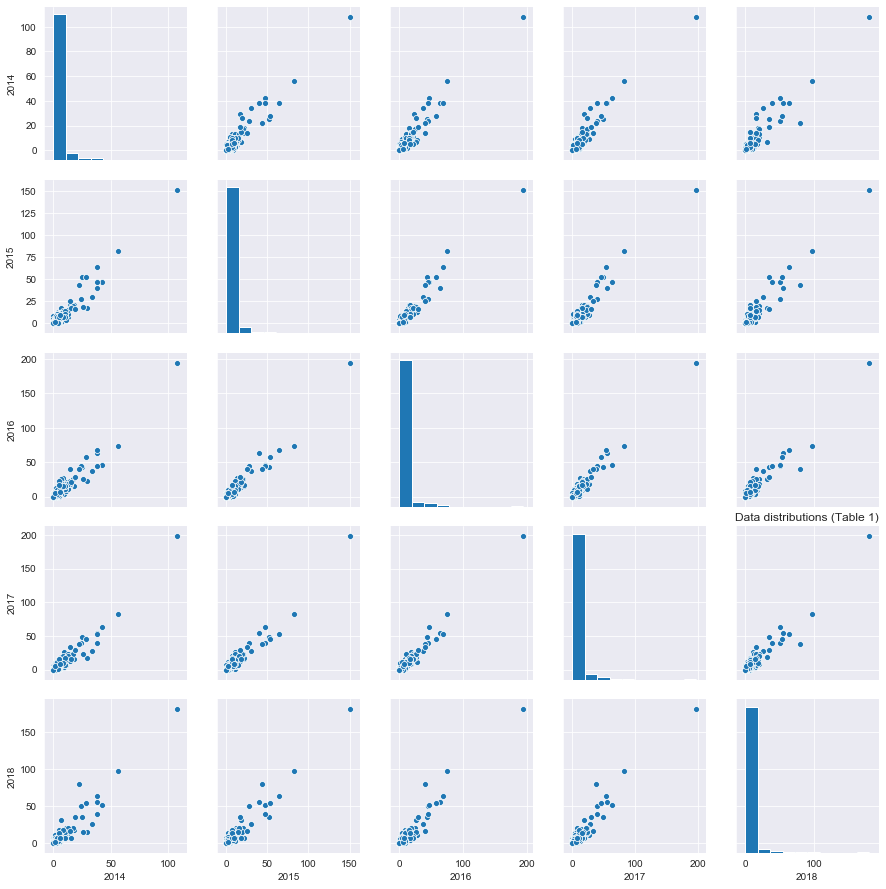

In [14]:
sns.pairplot(table1)
plt.title('Data distributions (Table 1)')
plt.show()

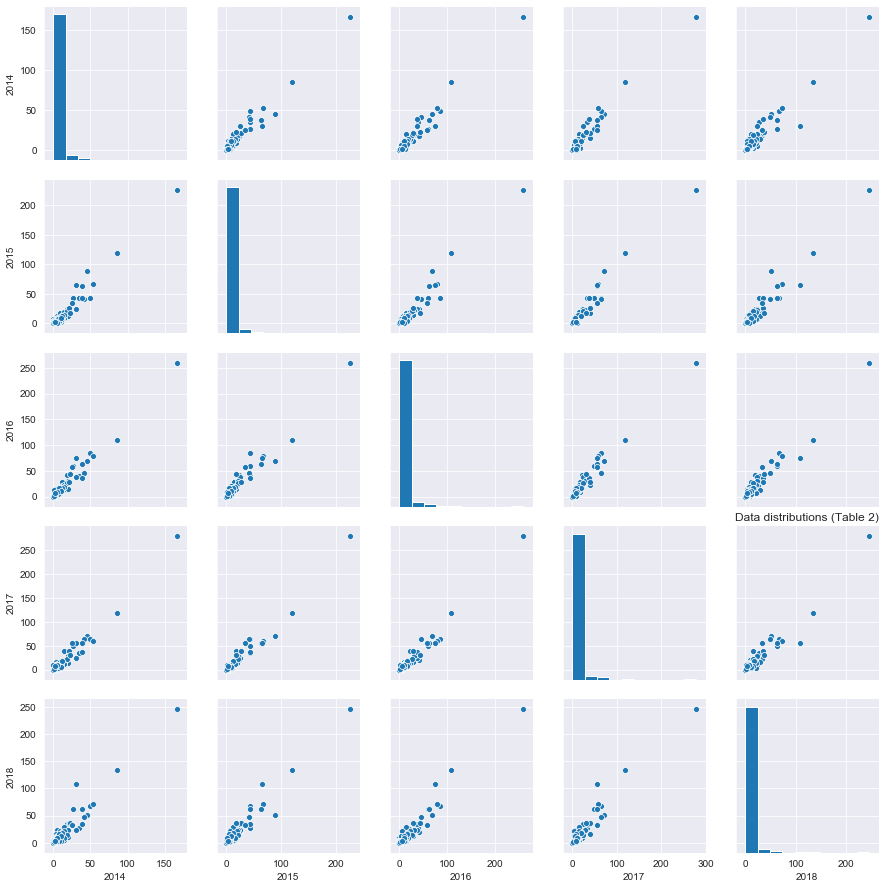

In [15]:
sns.pairplot(table2)
plt.title('Data distributions (Table 2)')
plt.show()

In [16]:
display(table1[table1['2014'] > 50])
display(table2[table2['2017'] > 100])

,2014,2015,2016,2017,2018
city_resid,,,,,
boston,108,151,194,198,181
worcester,56,82,74,82,97


,2014,2015,2016,2017,2018
city_death,,,,,
boston,167,226,259,279,245
worcester,86,120,109,118,134


In [17]:
table2.head()

,2014,2015,2016,2017,2018
city_death,,,,,
abington,0,6,1,3,5
acton,1,2,3,0,1
acushnet,0,4,2,4,0
adams,2,3,1,0,4
agawam,1,2,0,4,8


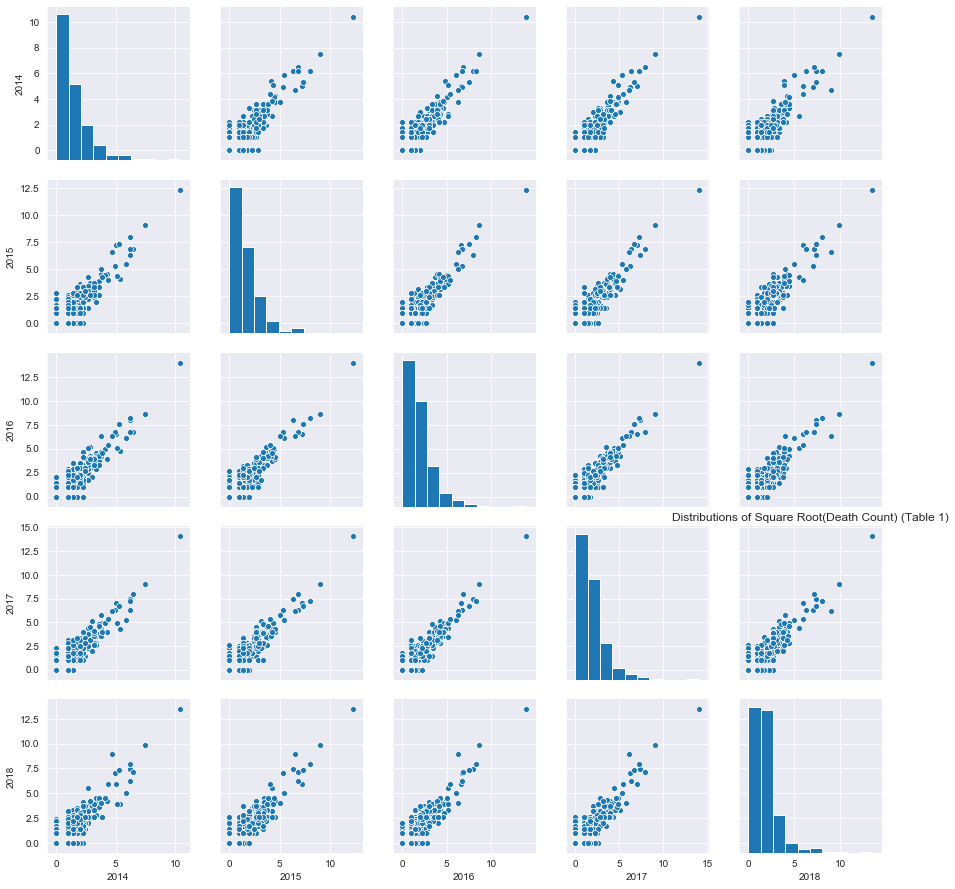

In [18]:
# square root all values to get a better look at data (vs log - infinity for all zeroes)
sns.pairplot(table1.apply(np.sqrt))
plt.title('Distributions of Square Root(Death Count) (Table 1)')
plt.show()

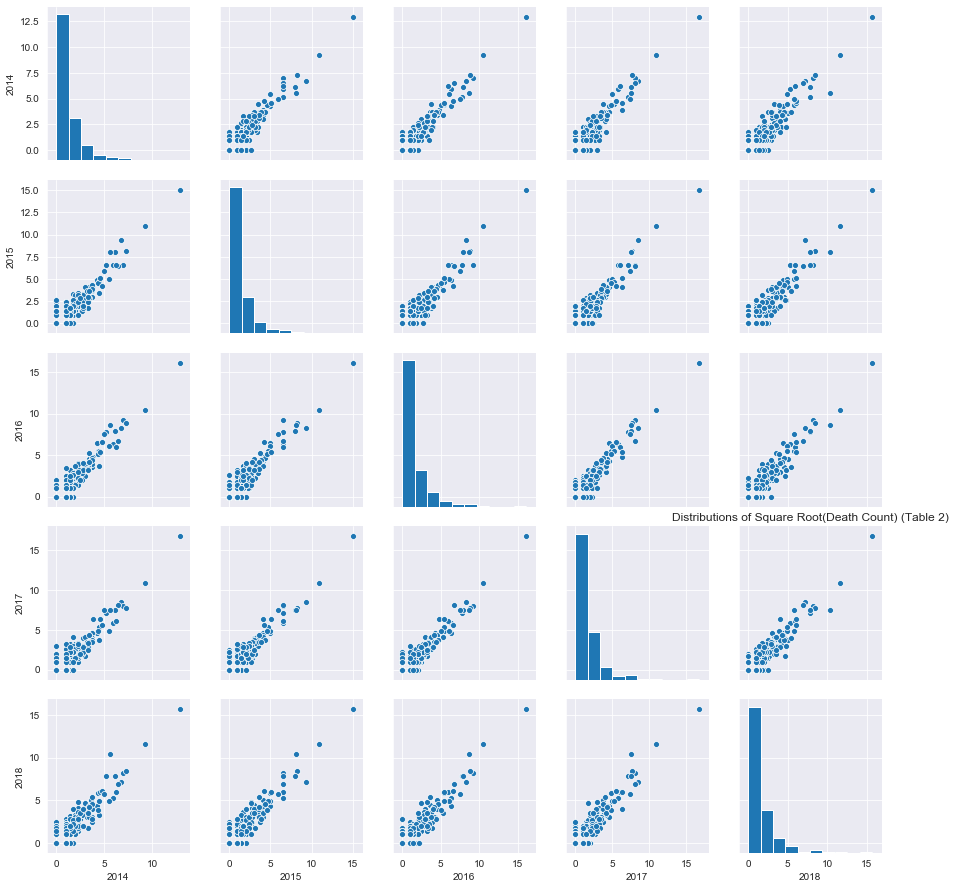

In [19]:
# square root all values to get a better look at data (vs log - infinity for all zeroes)
sns.pairplot(table2.apply(np.sqrt))
plt.title('Distributions of Square Root(Death Count) (Table 2)')
plt.show()

Notes:
* Overall, most death counts are close to 0 for MA towns - zero heavy distributions
* Boston and Worcester have highest death counts, but these are the cities with highest population counts in MA
* Strong positive relationship between death counts year over year for each town (not surprising)
* Normalize death count to population count for each town - need population estimate for each town

In [20]:
#table1.to_csv("../clean_data/ma_town_opioid_overdose_death_by_place_of_resid_2014_to_2018.csv")
#table2.to_csv("../clean_data/ma_town_opioid_overdose_death_by_place_of_death_2014_to_2018.csv")